In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import r2_score


### Dataset :
https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices

In [ ]:
main_df = pd.read_csv("/content/autos.csv",)

In [ ]:
df = pd.read_csv("/content/autos.csv", nrows = 1000)

# Used Cars Price Prediction

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

# Linear Regression using powerPS and Price as target





In [ ]:
df = df[['powerPS', 'price']]

In [ ]:
# to check if there are any null values
df.isnull().sum()

powerPS    0
price      0
dtype: int64

In [ ]:
# Scaling both the columns as they are on different scales so that plotting will be good and will be useful for the
# linear model to train faster with small scales
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.columns = ['powerPS', 'price']

In [ ]:
X = df['powerPS']
y = df['price']

<Axes: xlabel='powerPS', ylabel='Count'>

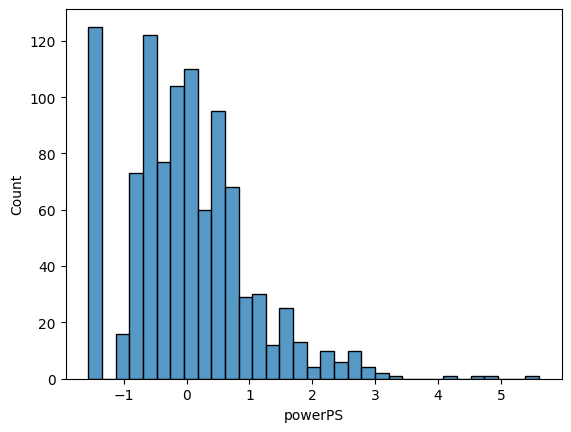

In [ ]:
# Distribution of powerPS
sns.histplot(X)

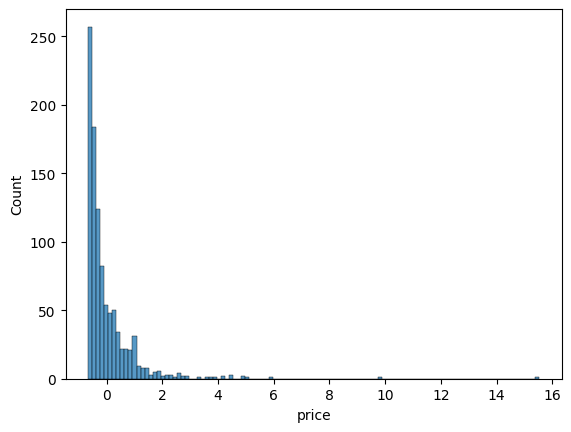

In [ ]:
sns.histplot(y);

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 3)

In [ ]:
print(f"X_train :{X_train.shape} , y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}  , y_test : {y_test.shape}")

X_train :(700,) , y_train : (700,)
X_test : (300,)  , y_test : (300,)


In [ ]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train , y_train)

LinearRegression()

In [ ]:
linear_model.intercept_

array([0.03128494])

In [ ]:
# Predictions
y_pred_linear = linear_model.predict(X_test)

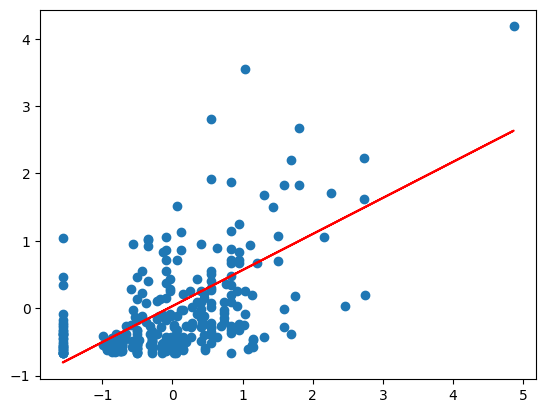

In [ ]:
#plt.scatter(y_test-y_pred , y_pred)
plt.scatter(X_test , y_test)
plt.plot(X_test , y_pred_linear , color = 'r' )
plt.show()

In [ ]:
mean_squared_error(y_test , y_pred_linear)

0.3774627440872938

In [ ]:
linear_model.score(X_test , y_test)

0.2631022221284903

Linear Regression with powerPS and Price features as independent variable and the target variable.

The accuracy after building the Linear Regression model for the above mentioned features is 26% . From this we can say that powerPS feature is not that useful in estimating the prices of the used cars.

After inputting different features we hope to get a good accuracy for predicting the car price.

# KNN-Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_model.score(X_test , y_test)

0.3326559760838329

In [ ]:
y_pred_knn = knn_model.predict(X_test)

## Comparing Linear Regression Vs KNN Regressor

In [ ]:
# Importing the error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Linear Regression Performance Results
print("Performance Metrics of Linear Regression Model on car Dataset")
print(f"Mean Squared Error of Linear Regression: {mean_squared_error(y_test , y_pred_linear)}")
print(f"Mean Absoulte Error of Linear Regression: {mean_absolute_error(y_test, y_pred_linear)}")

print("--"*20)

# Knn Regression Performance Results
print("Performance Metrics for KNN Regression Model on car Dataset")
print(f"Mean Squared Error of KNN Regressor : {mean_squared_error(y_test, y_pred_knn)}")
print(f"Mean Absolute Error of KNN Regressor: {mean_absolute_error(y_test , y_pred_knn)}")


Performance Metrics of Linear Regression Model on car Dataset
Mean Squared Error of Linear Regression: 0.3774627440872938
Mean Absoulte Error of Linear Regression: 0.4748297830303672
----------------------------------------
Performance Metrics for KNN Regression Model on car Dataset
Mean Squared Error of KNN Regressor : 0.3418350741201116
Mean Absolute Error of KNN Regressor: 0.38383814067634237


The above results shows that the KNN regressor model is working better on our dataset when compared to the linear regression model

# Logistic Regression

In [ ]:
# choosing the categorical variable from the set of features
main_df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


In [ ]:
df = pd.read_csv("/content/autos.csv" , nrows = 1000)

In [ ]:
df['price'].min()

0

In [ ]:
df['price'].max()

139997

In [ ]:
df['price'].mean()

5755.082

In [ ]:
df['Costly or Not'] = df['price'].apply(lambda x : 1 if x > 5755 else 0)

In [ ]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Costly or Not
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,0
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,1
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,1
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,0
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,0


In [ ]:
# choosing the colums to work with logistc regression

#Independent Variables
X = df[['yearOfRegistration','kilometer', 'brand']]
y = df['Costly or Not']


In [ ]:
X.isnull().sum()

yearOfRegistration    0
kilometer             0
brand                 0
dtype: int64

I have taken the price column and used it to convert to my categorical variable by using a threshold value for using it in Logistic Regression

In [ ]:
df['Costly or Not'].value_counts()

0    681
1    319
Name: Costly or Not, dtype: int64

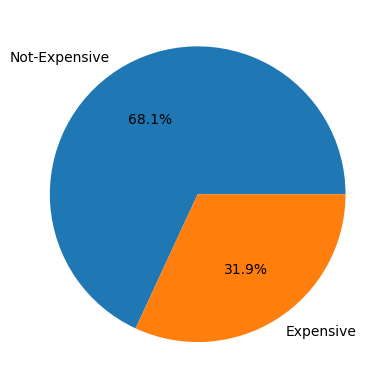

In [ ]:
plt.pie(df['Costly or Not'].value_counts() , autopct = "%1.1f%%" , labels = ["Not-Expensive","Expensive"]);

In [ ]:
# importing onehotencoder to convert the brand column to binary
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = pd.get_dummies(data = X , columns = ['brand'])

In [ ]:
X

,yearOfRegistration,kilometer,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1993,150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2011,125000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004,125000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008,90000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,125000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,2010,20000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,2007,150000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
998,2017,150000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(f"X-shape : {X.shape}")
print(f"y-shape: {y.shape}")

X-shape : (1000, 40)
y-shape: (1000,)


In [ ]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Printing length of training and test sets
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating Logistic Regression Model
log_reg= LogisticRegression()

# Train the model
log_reg.fit(X_train,y_train)

# Intercept and Coefficients
print("Intercept:",log_reg.intercept_,"\nCoefficients:", log_reg.coef_)

Intercept: [4.15642313e-07] 
Coefficients: [[ 8.46496788e-04 -1.99546722e-05 -2.78888760e-09  2.08088529e-07
   3.29307923e-07  2.93102388e-09 -1.41863890e-08 -2.26274735e-08
  -4.19908003e-09 -4.82396436e-09  0.00000000e+00 -2.37846864e-08
  -6.70317046e-09 -3.84162588e-08 -9.92197804e-09  0.00000000e+00
   1.22927099e-08 -3.53223208e-09 -4.19904356e-09 -3.40878528e-08
   2.52739618e-07  4.08465805e-08 -2.31749836e-08  8.37328057e-09
  -1.23131344e-07 -5.27496970e-08  2.98668783e-08 -1.36551041e-07
  -4.19902536e-09 -4.19899808e-09  3.01607030e-08  2.40019712e-08
  -3.33809662e-08  2.75266113e-08  8.71866159e-09  8.85573979e-09
  -2.39337713e-09 -4.19888036e-09 -2.22156514e-09 -1.25970215e-08]]


In [ ]:
# predictions
log_reg_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , log_reg_pred)

0.74

In [ ]:
# Testing the scores for both the train and test sets

print("For Training set")
print(f"Accuracy score : {log_reg.score(X_train , y_train)}")

print("-"*30)

print("For Testing set")
print(f"Accuracy score: {log_reg.score(X_test , y_test)}")

For Training set
Accuracy score : 0.7357142857142858
------------------------------
For Testing set
Accuracy score: 0.74


In [ ]:
# Predicting the probabilities of Logistic Regression

probs = log_reg.predict_proba(X_test)[:,1]

In [ ]:
probs[:10]

array([0.52666921, 0.21370316, 0.62363957, 0.21512903, 0.21341888,
       0.21484334, 0.81848916, 0.57598793, 0.21441524, 0.47555763])

In [ ]:
thresholds = [0.3,0.4,0.5,0.6,0.7]
from sklearn.metrics import classification_report
for i in thresholds:
    # Importing the required function
    log_reg_pred_best_threshold = (probs>=i).astype(int)
    # Generating the report and printing the same
    print(f"Classification report for {i} threshold")
    print(classification_report(y_test,log_reg_pred_best_threshold))
    print("--"*40)




Classification report for 0.3 threshold
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       204
           1       0.50      0.59      0.54        96

    accuracy                           0.68       300
   macro avg       0.65      0.66      0.65       300
weighted avg       0.70      0.68      0.69       300

--------------------------------------------------------------------------------
Classification report for 0.4 threshold
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       204
           1       0.57      0.51      0.54        96

    accuracy                           0.72       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.71      0.72      0.72       300

--------------------------------------------------------------------------------
Classification report for 0.5 threshold
              precision    recall  f1-score   support

         

In [ ]:
# It looks like for threshold greater than 0.5 it looks kind of plateau but let us try for some lenghts in between those areas

threshold = np.linspace(0.5,0.7, 10)

In [ ]:
threshold

array([0.5       , 0.52222222, 0.54444444, 0.56666667, 0.58888889,
       0.61111111, 0.63333333, 0.65555556, 0.67777778, 0.7       ])

In [ ]:
for i in threshold:
    # Importing the required function
    log_reg_pred_best_threshold = (probs>=i).astype(int)
    # Generating the report and printing the same
    print(f"Classification report for {i} threshold")
    print(classification_report(y_test,log_reg_pred_best_threshold))
    print("--"*40)

Classification report for 0.5 threshold
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       204
           1       0.65      0.42      0.51        96

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.72       300

--------------------------------------------------------------------------------
Classification report for 0.5222222222222223 threshold
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       204
           1       0.64      0.41      0.50        96

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300

--------------------------------------------------------------------------------
Classification report for 0.5444444444444444 threshold
              precision    recall 

From the above figures i can conclude that a threshold of > 0.5 and < 0.7 are giving better results for my particular dataset

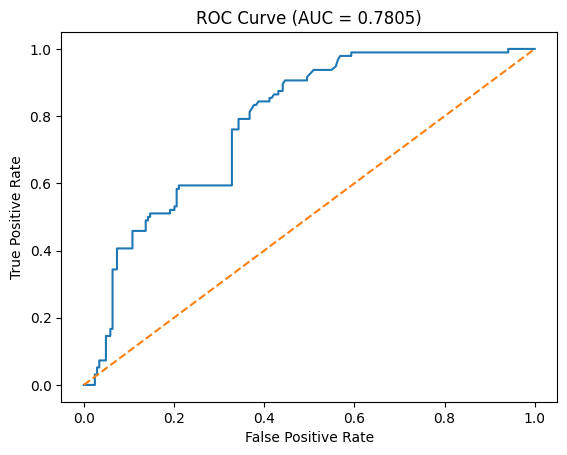

Best Threshold: 0.21470058430616326


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.4f})'.format(auc_score))
plt.show()

# Find the threshold with the highest Youden's J statistic
j_scores = tpr - fpr
# Maximizing J scores is technique for getting Best Threshold value
best_threshold = thresholds[np.argmax(j_scores)]
print('Best Threshold:', best_threshold)

In [ ]:
log_reg_pred_best_threshold = (probs >= best_threshold).astype(int)

In [ ]:
# Generating the report and printing the same
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       204
           1       0.65      0.42      0.51        96

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.72       300



In [ ]:
print(classification_report(y_test,log_reg_pred_best_threshold))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69       204
           1       0.49      0.91      0.64        96

    accuracy                           0.67       300
   macro avg       0.71      0.73      0.66       300
weighted avg       0.79      0.67      0.67       300



# Building the Regression Model from :  linear regression, k-nn regression, decision tree, random forest)

In [ ]:
# downloading the dataset
original_df = pd.read_csv('/content/autos.csv', nrows=30000)

In [ ]:
original_df.shape

(30000, 21)

In [ ]:
original_df.isnull().sum()

index                     0
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            3150
yearOfRegistration        0
gearbox                1625
powerPS                   0
model                  1634
kilometer                 0
monthOfRegistration       0
fuelType               2767
brand                     0
notRepairedDamage      5859
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
df = original_df.dropna() # removed the null values from the dataset as more are of categorical value and no way of giving a single value as it would be a biased decision

In [ ]:
df.shape

(21056, 21)

In [ ]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,...,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [ ]:
# preprocesssing the data

df['name'].sample(130)


25639    Audi_A6_Avant_2_5_TDI_*NAVI*LEDER*RÜCKFAHRKAME...
26689        Opel_Corsa_TÜV_NEU*Erst57Tkm*Automatik*Servo*
21094                                             BMW_320i
13914    Gepflegter_Opel_Vectra_mit_Klimaanlage__Sommer...
23444                                           Opel_Corsa
                               ...                        
1719                                        BMW_525d_Sport
12627                Jeep_Grand_Cherokee_3.0I_CRD_Overland
7925     BMW_320i_Edition_Sport_M_Paket_TÜV/Service_NEU!!!
16105                       Mercedes_Benz_W116_V8_S_Klasse
2704          Audi_A3_Cabriolet_1.8_TFSI_S_tronic_Ambition
Name: name, Length: 130, dtype: object

In [ ]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [ ]:
df['gearbox'].value_counts()

manuell      16222
automatik     4834
Name: gearbox, dtype: int64

In [ ]:
# preprocessing the data



#the date_crawled and the lastSeen will be removed as  I don't want to take time series under consideration

# the name column will not be considered as we have the brand data under brand column


# the seller has only 1 unique value so this will be removed
print(df['seller'].unique())
# the offertype has only 1 unique value so this will be removed
print(df['offerType'].unique())

#the nrOfPictures has only 1 unique so will not be considered
print(df['nrOfPictures'].unique())




df.drop(columns=['index','dateCrawled','name','seller','offerType','dateCreated','lastSeen'],inplace = True)

['privat']
['Angebot']
[0]


In [ ]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0,91074
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0,60437
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,0,33775
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,0,67112
7,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0,19348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,399,control,kombi,1997,manuell,116,vectra,150000,7,benzin,opel,nein,0,4179
29995,17500,test,limousine,2013,manuell,184,3er,90000,1,diesel,bmw,nein,0,64850
29996,4990,control,kleinwagen,2007,manuell,60,corsa,50000,11,benzin,opel,nein,0,1219
29997,3790,control,kleinwagen,2008,manuell,75,clio,125000,7,benzin,renault,nein,0,91438


In [ ]:
# using the columns : seller ,
X = df[['abtest','vehicleType','yearOfRegistration','kilometer', 'brand', 'gearbox','powerPS','fuelType']]

y=df['price']

In [ ]:
X.head()

,abtest,vehicleType,yearOfRegistration,kilometer,brand,gearbox,powerPS,fuelType
3,test,kleinwagen,2001,150000,volkswagen,manuell,75,benzin
4,test,kleinwagen,2008,90000,skoda,manuell,69,diesel
5,test,limousine,1995,150000,bmw,manuell,102,benzin
6,test,cabrio,2004,150000,peugeot,manuell,109,benzin
7,test,limousine,1980,40000,volkswagen,manuell,50,benzin


In [ ]:
y.head()

3    1500
4    3600
5     650
6    2200
7       0
Name: price, dtype: int64

<Axes: xlabel='count', ylabel='brand'>

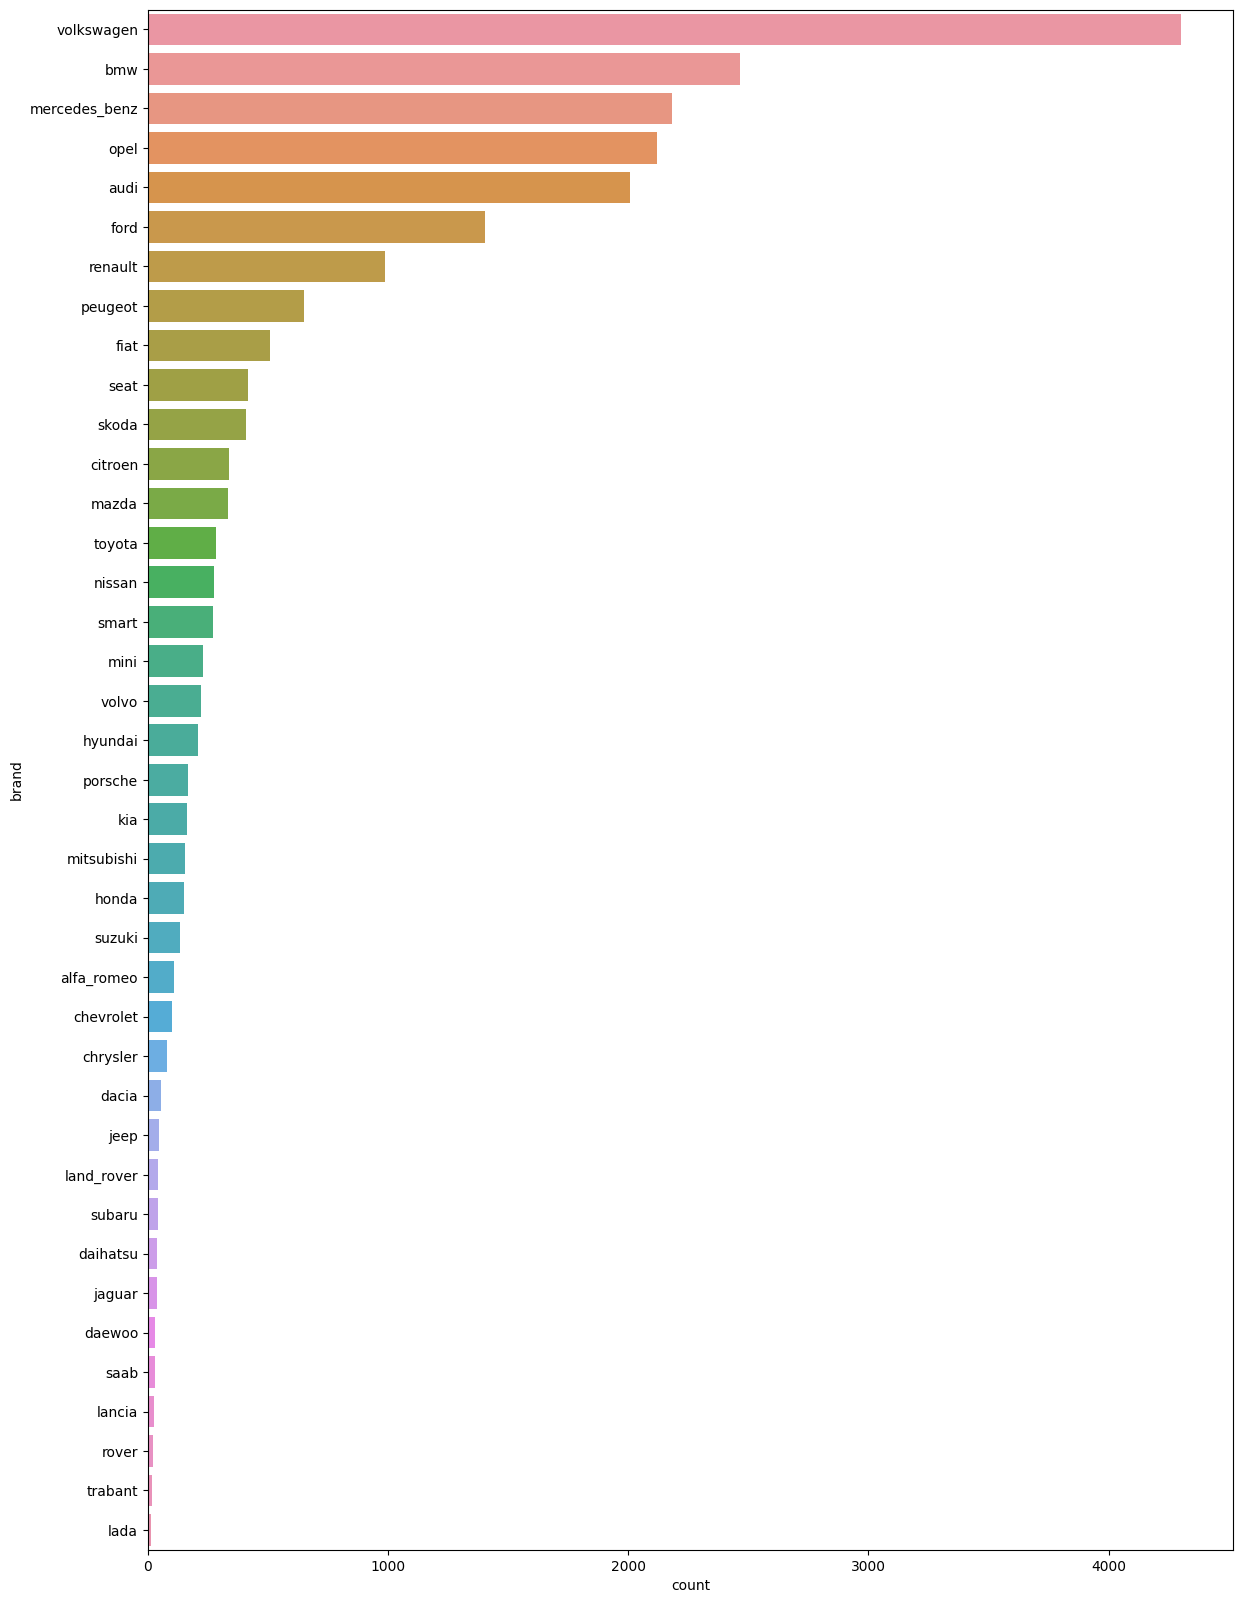

In [ ]:

#Plotting
plt.figure(figsize=(14,20))
sns.countplot(y=df['brand'],order=df['brand'].value_counts().index
              )

<Axes: xlabel='count', ylabel='model'>

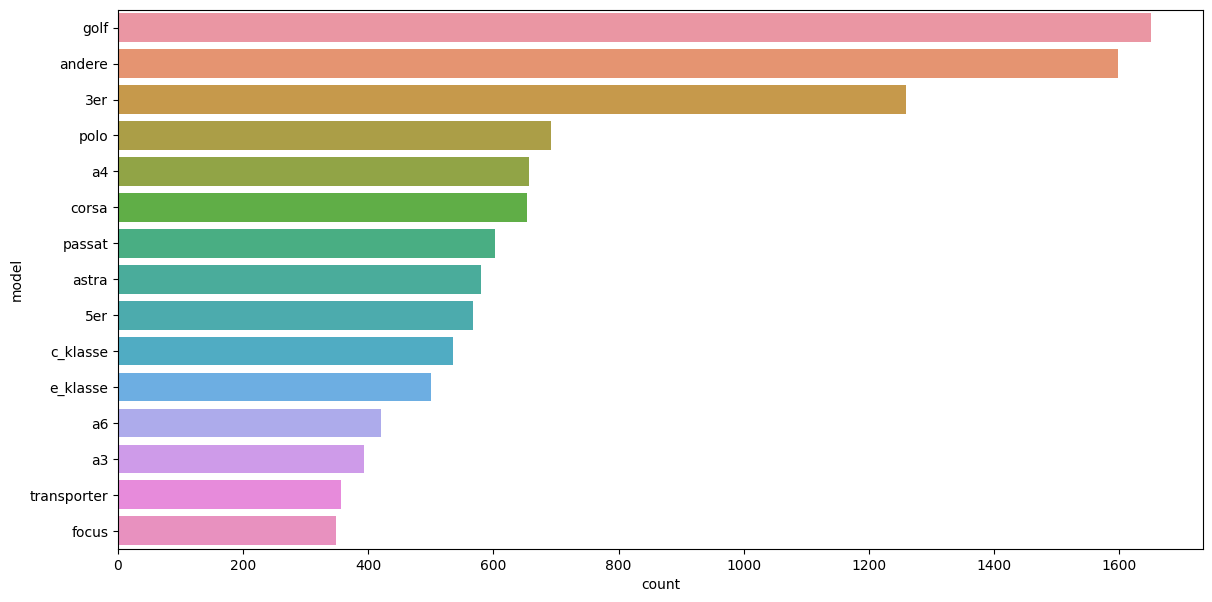

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(y=df['model'],order=df['model'].value_counts().index[0:15])

<Axes: xlabel='fuelType', ylabel='count'>

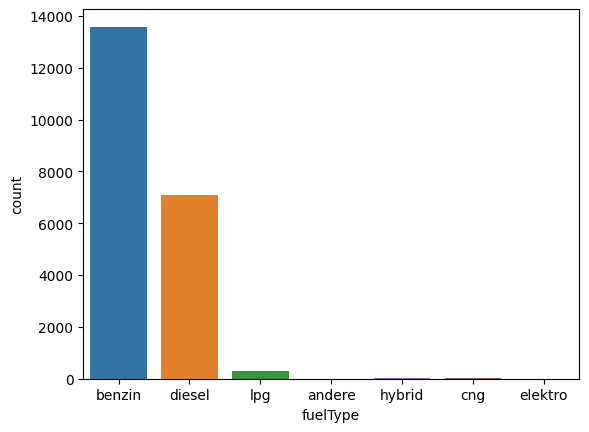

In [ ]:
sns.countplot(x= df['fuelType'])

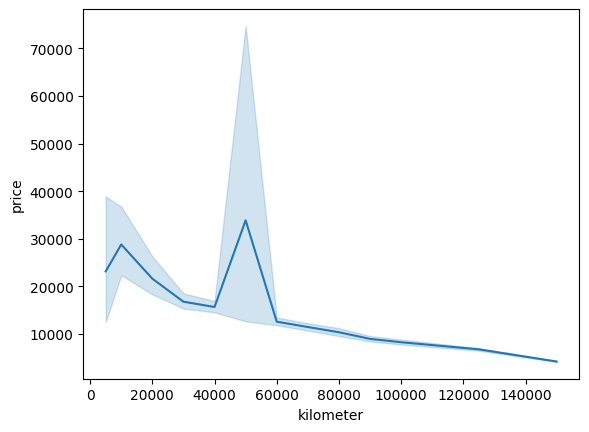

In [ ]:
# plotting two numerical values Kilometer and price

sns.lineplot(x=X['kilometer'],y=y);

We can see from above that as the number of kilometers the car is being drove the price of it is decreasing which is usally the case

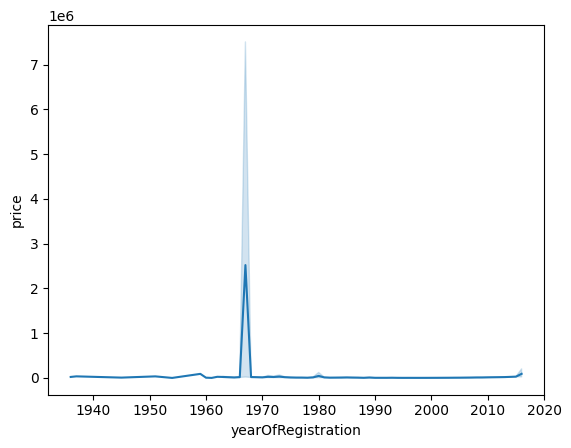

In [ ]:
sns.lineplot(x= X['yearOfRegistration'], y= y);

There is a spike in the used car prices betweend the time maybe from 1965-1970 .

In [ ]:
X.columns

Index(['abtest', 'vehicleType', 'yearOfRegistration', 'kilometer', 'brand',
       'gearbox', 'powerPS', 'fuelType'],
      dtype='object')

In [ ]:
# one hot encoding the data as we have categorical columns
X = pd.get_dummies(X, columns = ['abtest', 'vehicleType','brand','gearbox','fuelType'])
X

,yearOfRegistration,kilometer,powerPS,abtest_control,abtest_test,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,...,brand_volvo,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
3,2001,150000,75,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,2008,90000,69,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
5,1995,150000,102,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6,2004,150000,109,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
7,1980,40000,50,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1997,150000,116,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
29995,2013,90000,184,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
29996,2007,50000,60,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
29997,2008,125000,75,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1201)

# Lengths of X training and y_training data along with the testing data
print(f"X_train: {len(X_train)},y_train:{len(y_train)} ")
print('-'*30)
print(f"X_test: {len(X_test)},y_test:{len(y_test)} ")


X_train: 14739,y_train:14739 
------------------------------
X_test: 6317,y_test:6317 


## Random Forest Regressor

In [ ]:
Random_forest_regressor = RandomForestRegressor(max_depth=4, random_state=1201)
Random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=1201)

In [ ]:
# predictin the testing lables



y_pred = Random_forest_regressor.predict(X_test)

print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
# print(f"Accuracy of the Random Forest Regressor: {accuracy_score(y_test, preds)}")
# print(f"mean_squared_error of Random Forest Regressor: {mean_squared_error(y_test, preds)}")
# print(f"Score of Random Forest Regressor : (Random_forsest_regressor.score(X_test))")

R^2 :  0.49888201708858315
MAE : 3012.969747370644
RMSE: 6724.89661871416


Using GridSearchCV to try to improve the Random Forest Regressor

In [ ]:
parameters = {
    'n_estimators': [20, 30, 50, 70,120,100,110],
    'max_depth': [10,20,30,40,50],
    'min_samples_leaf' :  [10,20,30,100],
    'max_features' : [0.1, 0.2, 0.6, 0.9]


}

Random_forest_regressor = RandomForestRegressor(random_state=1201)

clf = GridSearchCV(Random_forest_regressor, parameters , verbose=True , cv=3)
clf.fit(X_train, y_train)


Fitting 3 folds for each of 560 candidates, totalling 1680 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1201),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': [0.1, 0.2, 0.6, 0.9],
                         'min_samples_leaf': [10, 20, 30, 100],
                         'n_estimators': [20, 30, 50, 70, 120, 100, 110]},
             verbose=True)

In [ ]:
print("RF Best Score:", clf.best_score_)
print("RF Best Parameters:", clf.best_params_)

RF Best Score: 0.2912165176386696
RF Best Parameters: {'max_depth': 10, 'max_features': 0.2, 'min_samples_leaf': 100, 'n_estimators': 110}


In [ ]:
random_forest_2 = RandomForestRegressor(max_depth=10 , min_samples_leaf=100 , n_estimators = 70,max_features = 0.2 ,random_state = 1201)
random_forest_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=0.2, min_samples_leaf=100,
                      n_estimators=70, random_state=1201)

In [ ]:
y_pred = random_forest_2.predict(X_test)

print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.5794633666914016
MAE : 2842.378200757967
RMSE: 6160.522316717545


The Score of the Random Forest Model has been increased by around 8% after the hyper-parameter tuning. It can be increased when we use many different combiantions of the parameters.

## Running the dataset on multiple regressors to check the results

In [ ]:
from sklearn.linear_model import Lasso , Ridge

regressors = [LinearRegression(),
              DecisionTreeRegressor(),
              Lasso(),
              Ridge(),
              KNeighborsRegressor(),
              RandomForestRegressor()]

In [ ]:
for model in regressors[:head]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))

LinearRegression()
	Mean absolute error: 6142.017555302649
	R2 score: -0.8231781759369583
DecisionTreeRegressor()
	Mean absolute error: 2244.6653791299545
	R2 score: 0.5760434636474643
Lasso()
	Mean absolute error: 6132.058051878047
	R2 score: -0.8188959116301178
Ridge()
	Mean absolute error: 6131.565006132351
	R2 score: -0.7998137715542788
KNeighborsRegressor()
	Mean absolute error: 2192.958651258509
	R2 score: 0.37926390245698294
RandomForestRegressor()
	Mean absolute error: 1837.1384257008485
	R2 score: 0.5928886814579408


In [ ]:
# Running the above models with GridSearchCV with different hyperparameters

decision_tree_params = {"splitter":['best', 'random'],
                        "max_depth": range(1,10,2),
                        "max_features": ['auto','sqrt','log2']}

Kneighbors_params = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                     'leaf_size': range(1,40,2)}

regressors = [DecisionTreeRegressor(), KNeighborsRegressor()]


param_grids = [decision_tree_params,
               Kneighbors_params]

In [ ]:

from sklearn.model_selection import StratifiedKFold , KFold
# Define two list to store the results and estimators
cv_result = []
best_estimators = []

# Iterate over the models and their hyperparameter grids
for i in range(len(regressors)):

    # Define the stratified K-fold cross-validation scheme
    cv = KFold(n_splits = 3)

    # Define the grid search strategy
    clf = GridSearchCV(regressors[i],
                       param_grid=param_grids[i],
                       cv = cv,
                       scoring = "neg_mean_squared_error",
                       n_jobs = -1,
                       verbose = 1)

    # Print the cross validation score, best parameters and the train and test accuracy of the model
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

    #print("Machine Learning Models:", model_names[i])
    print("Cross Validation Scores:", cv_result[i])
    print("Best Parameters:", best_estimators[i])
    print("\n-----------------------------------------------------\n")
    y_pred = clf.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    print("\n-----------------------------------------------------\n")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Cross Validation Scores: -6451782842.783268
Best Parameters: DecisionTreeRegressor(max_depth=9, max_features='log2')

-----------------------------------------------------

R^2 :  -1.0524567820752346
MAE : 4318.094011295147
RMSE: 13609.827757857787

-----------------------------------------------------

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Cross Validation Scores: -6934656646.94627
Best Parameters: KNeighborsRegressor(algorithm='kd_tree', leaf_size=21)

-----------------------------------------------------

R^2 :  0.3799058347080533
MAE : 2184.29450688618
RMSE: 7480.737935477621

-----------------------------------------------------



In [ ]:
# creating a new test set to test the random Forest Regressor as it gave the best possible value
original_df = pd.read_csv("/content/autos.csv")

In [ ]:
df = original_df.dropna()
df = original_df[30000:40000]
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
30000,30000,2016-03-07 16:40:12,Audi_A4_Cabriolet_1.8_T,privat,Angebot,9550,control,cabrio,2006,manuell,...,a4,125000,8,benzin,audi,nein,2016-03-07 00:00:00,0,41379,2016-04-05 16:44:56
30001,30001,2016-03-28 11:37:40,aus_erster_Hand_von_PRIVAT,privat,Angebot,4500,control,kleinwagen,2007,manuell,...,polo,125000,11,benzin,volkswagen,nein,2016-03-28 00:00:00,0,22941,2016-04-04 12:17:55
30002,30002,2016-03-26 17:43:29,Golf_4_Comfortline_mit_16_Monaten_TÜV__Alufelg...,privat,Angebot,1499,control,limousine,1997,manuell,...,golf,150000,10,benzin,volkswagen,nein,2016-03-26 00:00:00,0,96328,2016-03-28 06:17:24
30003,30003,2016-03-28 16:50:16,Smart_ForTwo,privat,Angebot,1050,test,coupe,1998,automatik,...,fortwo,150000,3,benzin,smart,ja,2016-03-28 00:00:00,0,69117,2016-03-30 08:16:42
30004,30004,2016-03-29 23:37:41,Toyota_Yaris_1.0_linea_sol,privat,Angebot,1555,control,kleinwagen,1999,manuell,...,yaris,150000,11,benzin,toyota,nein,2016-03-29 00:00:00,0,96199,2016-04-06 21:18:16


In [ ]:
df.shape

(10000, 21)

In [ ]:
df.isnull().sum()

index                     0
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            1035
yearOfRegistration        0
gearbox                 548
powerPS                   0
model                   582
kilometer                 0
monthOfRegistration       0
fuelType                953
brand                     0
notRepairedDamage      1957
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
df.dropna(inplace =True)

In [ ]:
X = df[['abtest','vehicleType','yearOfRegistration','kilometer', 'brand', 'gearbox','powerPS','fuelType']]

y=df['price']

In [ ]:
X

,abtest,vehicleType,yearOfRegistration,kilometer,brand,gearbox,powerPS,fuelType
30000,control,cabrio,2006,125000,audi,manuell,163,benzin
30001,control,kleinwagen,2007,125000,volkswagen,manuell,70,benzin
30002,control,limousine,1997,150000,volkswagen,manuell,101,benzin
30003,test,coupe,1998,150000,smart,automatik,45,benzin
30004,control,kleinwagen,1999,150000,toyota,manuell,68,benzin
...,...,...,...,...,...,...,...,...
39991,test,cabrio,2014,50000,bmw,automatik,313,diesel
39992,control,limousine,1999,150000,opel,manuell,106,benzin
39993,control,limousine,2011,100000,porsche,automatik,540,benzin
39995,control,kombi,2000,150000,volkswagen,manuell,116,diesel


In [ ]:
X = pd.get_dummies(X)


In [ ]:
#Testing the accuracy of the best Random Regression Model we built

random_forest_final = RandomForestRegressor(max_depth=10 , min_samples_leaf=100 , n_estimators = 70,max_features = 0.2 ,random_state = 1201)

In [ ]:
random_forest_2

RandomForestRegressor(max_depth=10, max_features=0.2, min_samples_leaf=100,
                      n_estimators=70, random_state=1201)

In [ ]:
y_pred = random_forest_2.predict(X)

print("R^2 : ", r2_score(y, y_pred))
print("MAE :", mean_absolute_error(y,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y, y_pred)))

R^2 :  0.6317208965258185
MAE : 2762.6842282526495
RMSE: 5042.159056159287


The above model gives a very satisfactory results on test set when tested with the test set which we not have tested before by taking out same samples . The R2 score for this set is 63% and the same model gave 49% R2 score for the training set.

The Random Forest Model is giving a slighlty imporved results when we trained it on other test set which it has not been tested on and trained on. The hyperparameter has not been much helpful in this case as the Normally instantiated model itself was able to get almost the same R2_score for the same model.


The r2_score can be improved if we use the bagging and boosting techniques with this data.We can use hyperparameters optimization tools like optuna to imporve the model further.
